# AIcrowd Tiring Text Challenge

In [4]:
import sys
!pip install git+https://gitlab.aicrowd.com/aicrowd/aicrowd-cli.git >/dev/null
%load_ext aicrowd.magic

  Running command git clone -q https://gitlab.aicrowd.com/aicrowd/aicrowd-cli.git /tmp/pip-req-build-l58g43n8
The aicrowd.magic extension is already loaded. To reload it, use:
  %reload_ext aicrowd.magic


In [5]:
%reload_ext aicrowd.magic

In [7]:
API_KEY = "906daefa5cd971fd9e089a213054d8ed"
%aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [8]:
%aicrowd dataset list -c tiring-text
%aicrowd dataset download -c tiring-text -j 3

              Datasets for challenge #748                                       
┌───┬───────────────────────┬─────────────┬───────────┐                         
│ # │ Title                 │ Description │      Size │                         
├───┼───────────────────────┼─────────────┼───────────┤                         
│ 0 │ sample_submission.csv │ -           │ 136.43 KB │                         
│ 1 │ test.csv              │ -           │  10.10 MB │                         
│ 2 │ train.csv             │ -           │  40.85 MB │                         
└───┴───────────────────────┴─────────────┴───────────┘                         


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub

In [10]:
df = pd.read_csv("train.csv")
df

,text,tag
0,". CHIEF JUSTICE ROBERTS , JUSTICE PRYOR . JUST...",news
1,want this pawn like not even to exist because ...,chess
2,"? If I was n't already at that URL , where mig...",programming
3,a power is 3x squared the derivative of positi...,math
4,Knight to f2 check and the White King has no m...,chess
...,...,...
79371,to watch the live streams follow on twitch lin...,chess
79372,WHO IS HE GOING TO GET TO PROSECUTE IT ? HE BR...,news
79373,is you 're not fighting on the right side of t...,chess
79374,about the MacBook if you were n't already goin...,tech


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


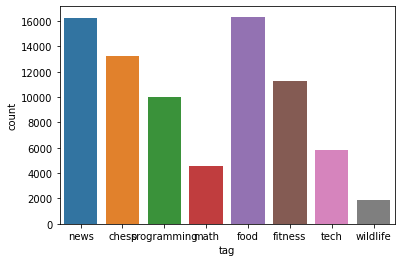

In [13]:
sns.countplot(df['tag'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv("train.csv")
X = train_df["text"]

le = LabelEncoder()
Y = le.fit_transform(train_df["tag"])

X_train, X_test ,Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(63500,)
(63500,)
(15876,)
(15876,)


In [26]:
from keras.utils import to_categorical

Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

print(Y_train_cat.shape)
print(Y_test_cat.shape)

(63500, 8)
(15876, 8)


In [50]:
# TL Model
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense


model = Sequential()

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed_size=512
trainable = False
hub_layer = hub.KerasLayer(module_url, input_shape=[], output_shape=[embed_size], dtype=tf.string, trainable=trainable)

model.add(hub_layer)
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(8, activation="softmax"))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.BinaryAccuracy(name="accuracy")])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)               

In [51]:
epochs=15
batch_size=128

model.fit(X_train, Y_train_cat,
          epochs=epochs, batch_size=batch_size,
          validation_data=(X_test, Y_test_cat),
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode="min")],
          verbose=1)

Epoch 1/15
1985/1985 [==============================] - 40s 19ms/step - loss: 0.3405 - accuracy: 0.9142 - val_loss: 0.0483 - val_accuracy: 0.9846
Epoch 2/15
1985/1985 [==============================] - 38s 19ms/step - loss: 0.0777 - accuracy: 0.9778 - val_loss: 0.0342 - val_accuracy: 0.9879
Epoch 3/15
1985/1985 [==============================] - 38s 19ms/step - loss: 0.0512 - accuracy: 0.9853 - val_loss: 0.0299 - val_accuracy: 0.9899
Epoch 4/15
1985/1985 [==============================] - 38s 19ms/step - loss: 0.0428 - accuracy: 0.9879 - val_loss: 0.0279 - val_accuracy: 0.9903
Epoch 5/15
1985/1985 [==============================] - 38s 19ms/step - loss: 0.0381 - accuracy: 0.9894 - val_loss: 0.0266 - val_accuracy: 0.9908
Epoch 6/15
1985/1985 [==============================] - 38s 19ms/step - loss: 0.0337 - accuracy: 0.9906 - val_loss: 0.0256 - val_accuracy: 0.9911
Epoch 7/15
1985/1985 [==============================] - 38s 19ms/step - loss: 0.0312 - accuracy: 0.9911 - val_loss: 0.0252 -

In [52]:
model.evaluate(X_test, Y_test_cat)

497/497 [==============================] - 7s 15ms/step - loss: 0.0233 - accuracy: 0.9926


[0.023250333964824677, 0.9925910234451294]

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics[["loss","val_loss"]].plot()

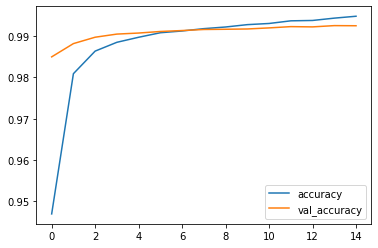

In [39]:
metrics[["accuracy","val_accuracy"]].plot()

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(X_train)
print(classification_report(Y_train, predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10551
           1       1.00      0.99      1.00      8989
           2       0.99      0.99      0.99     13135
           3       0.97      0.97      0.97      3653
           4       0.99      0.99      0.99     12940
           5       0.98      0.97      0.97      8008
           6       0.97      0.97      0.97      4672
           7       0.96      0.97      0.97      1552

    accuracy                           0.99     63500
   macro avg       0.98      0.98      0.98     63500
weighted avg       0.99      0.99      0.99     63500



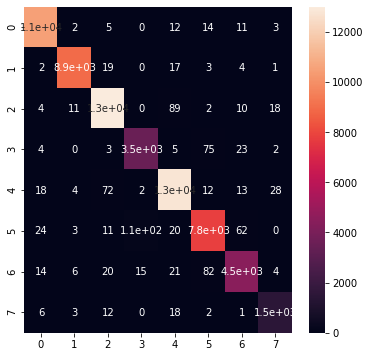

In [56]:
plt.figure(figsize=(6,6))
mat = confusion_matrix(Y_train, predictions)
sns.heatmap(mat, annot=True)
plt.show()

In [54]:
sub_df = pd.read_csv("test.csv")

X_sub = sub_df["text"]
Y_sub = model.predict_classes(X_sub)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
sub = le.inverse_transform(Y_sub)
submission = pd.DataFrame()
submission["tag"] = sub
submission.to_csv("tiring_submission.csv")

In [49]:
submission

,0
0,news
1,math
2,tech
3,chess
4,chess
...,...
19839,chess
19840,food
19841,programming
19842,fitness
